In [1]:
import pandas as pd
import numpy as np


In [2]:
train_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
train_data.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [6]:
train_data['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [7]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

In [10]:
train_data=train_data.drop(columns=['Unnamed: 0'])

In [12]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day'] = train_data['trans_date_trans_time'].dt.day
train_data['weekday'] = train_data['trans_date_trans_time'].dt.weekday
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,weekday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1


In [16]:
train_data['weekday'].value_counts()

weekday
0    254282
6    250579
5    200957
1    160227
4    152272
3    147285
2    131073
Name: count, dtype: int64

In [17]:
train_data['age'] = train_data['trans_date_trans_time'].dt.year - train_data['dob'].dt.year

In [18]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,weekday,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,33


In [20]:
train_data=train_data.drop(columns=['cc_num','first','last','street','zip','dob','trans_num','unix_time','merchant'])

In [21]:
from datetime import datetime
from math import radians, cos, sin, sqrt, atan2

In [22]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1, phi2 = radians(lat1), radians(lat2)
    d_phi = radians(lat2 - lat1)
    d_lambda = radians(lon2 - lon1)
    a = sin(d_phi/2)**2 + cos(phi1)*cos(phi2)*sin(d_lambda/2)**2
    return R * 2 * atan2(sqrt(a), sqrt(1 - a))

In [23]:
train_data['distance'] = train_data.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [40]:
train_data.head()

,trans_date_trans_time,category,amt,gender,city,state,city_pop,job,is_fraud,hour,day,weekday,age,distance
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,0,1,1,31,78.597568
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,0,1,1,41,30.212176
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,0,1,1,57,108.206083
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,0,1,1,52,95.673231
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,0,1,1,33,77.556744


In [41]:
train_data.drop(columns=['trans_date_trans_time','job',])

,category,amt,gender,city,state,city_pop,is_fraud,hour,day,weekday,age,distance
0,misc_net,4.97,F,Moravian Falls,NC,3495,0,0,1,1,31,78.597568
1,grocery_pos,107.23,F,Orient,WA,149,0,0,1,1,41,30.212176
2,entertainment,220.11,M,Malad City,ID,4154,0,0,1,1,57,108.206083
3,gas_transport,45.00,M,Boulder,MT,1939,0,0,1,1,52,95.673231
4,misc_pos,41.96,M,Doe Hill,VA,99,0,0,1,1,33,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,Hatch,UT,258,0,12,21,6,59,119.752136
1296671,food_dining,51.70,M,Tuscarora,MD,100,0,12,21,6,41,75.104085
1296672,food_dining,105.93,M,High Rolls Mountain Park,NM,899,0,12,21,6,53,99.047734
1296673,food_dining,74.90,M,Manderson,SD,1126,0,12,21,6,40,84.627652


In [26]:
train_data=train_data.drop(columns=['lat','long','merch_lat','merch_long'])

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns

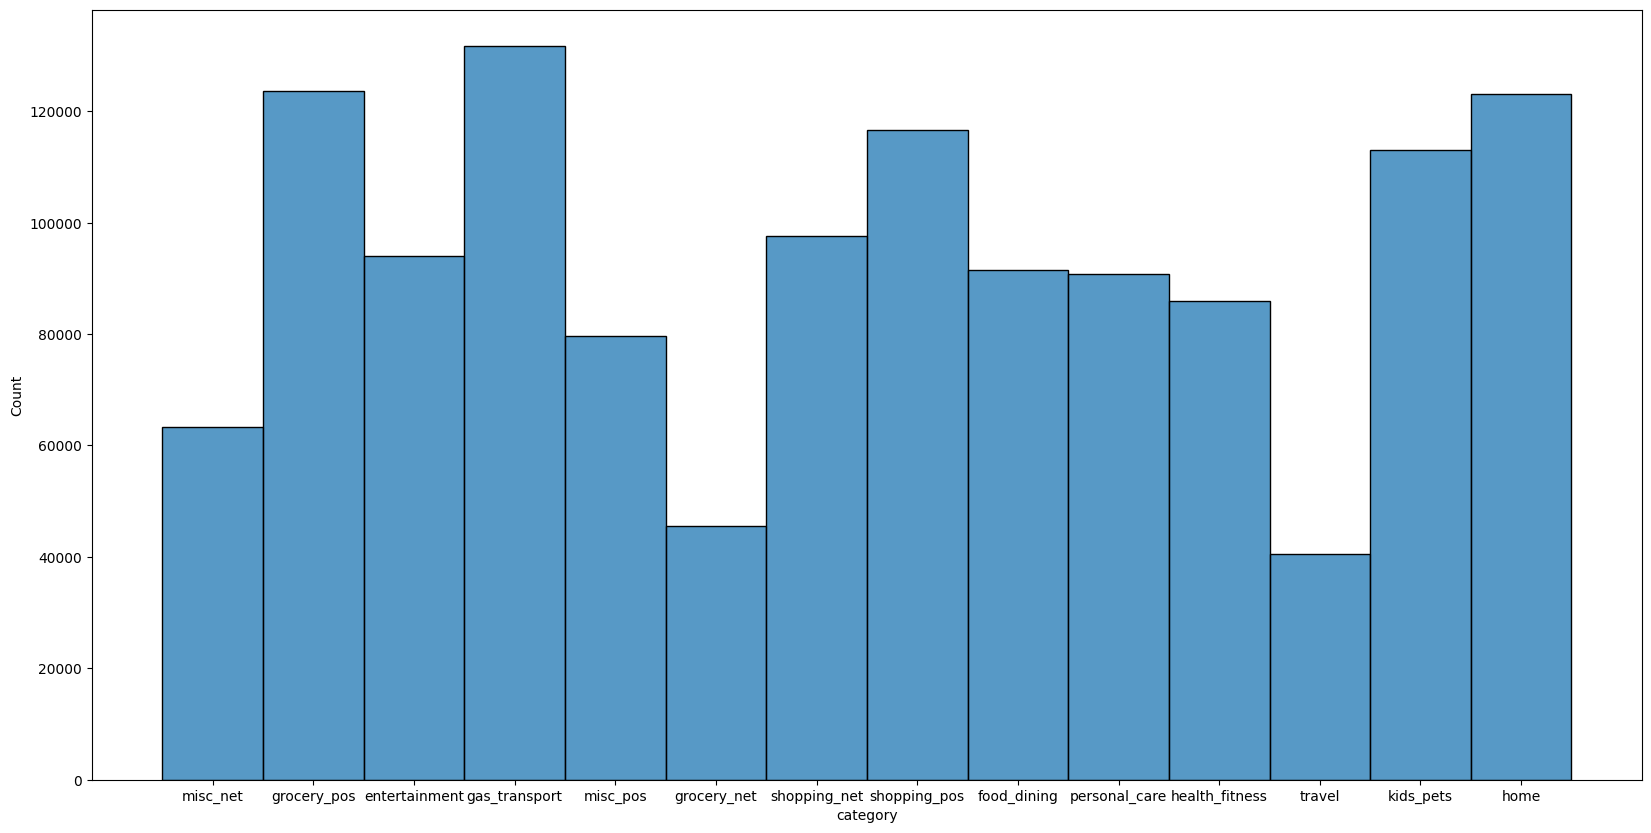

In [32]:
plt.figure(figsize=(20,10))
sns.histplot(train_data['category'])
plt.show()

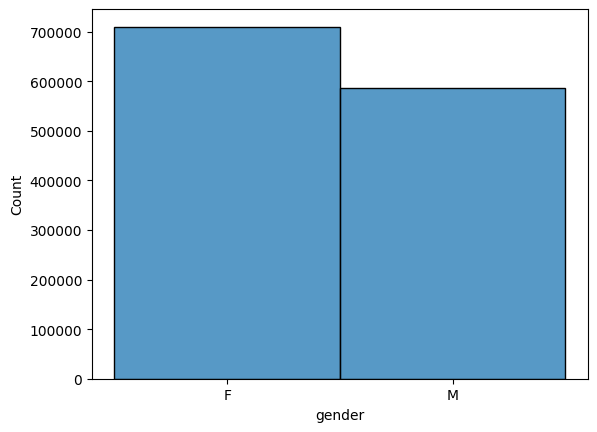

In [33]:
sns.histplot(train_data['gender'])
plt.show()

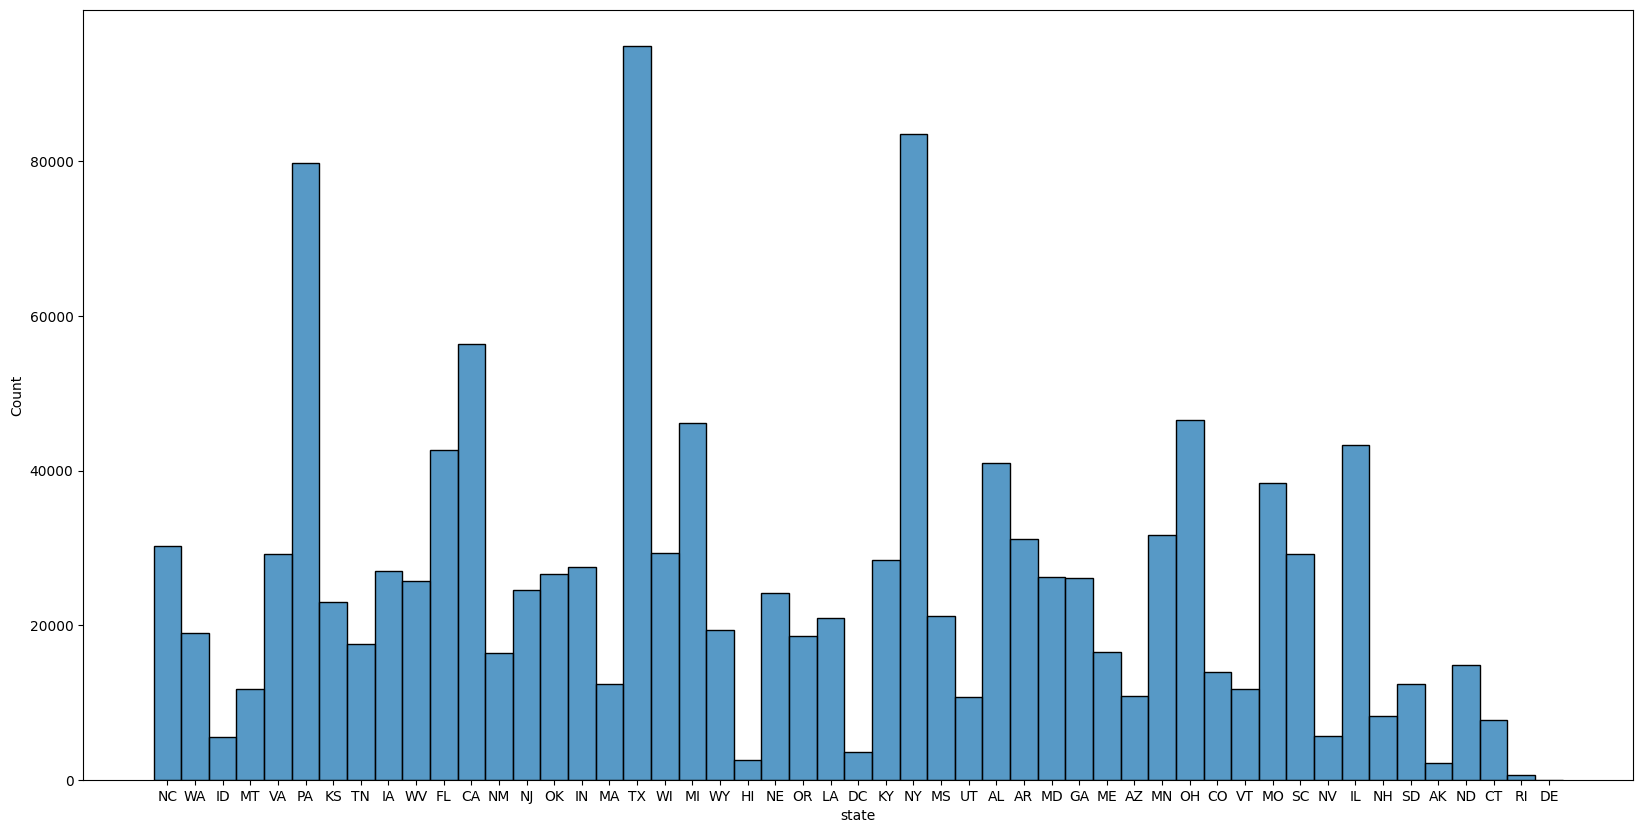

In [36]:
plt.figure(figsize=(20,10))
sns.histplot(train_data['state'])
plt.show()

In [42]:
train_data.dtypes

trans_date_trans_time    datetime64[ns]
category                         object
amt                             float64
gender                           object
city                             object
state                            object
city_pop                          int64
job                              object
is_fraud                          int64
hour                              int32
day                               int32
weekday                           int32
age                               int32
distance                        float64
dtype: object

In [45]:
cat_data= train_data.select_dtypes(include=['object'])
num_data=train_data.select_dtypes(exclude=['object'])

In [44]:
cat_data.head()

,category,gender,city,state,job
0,misc_net,F,Moravian Falls,NC,"Psychologist, counselling"
1,grocery_pos,F,Orient,WA,Special educational needs teacher
2,entertainment,M,Malad City,ID,Nature conservation officer
3,gas_transport,M,Boulder,MT,Patent attorney
4,misc_pos,M,Doe Hill,VA,Dance movement psychotherapist


In [46]:
num_data.head()

,trans_date_trans_time,amt,city_pop,is_fraud,hour,day,weekday,age,distance
0,2019-01-01 00:00:18,4.97,3495,0,0,1,1,31,78.597568
1,2019-01-01 00:00:44,107.23,149,0,0,1,1,41,30.212176
2,2019-01-01 00:00:51,220.11,4154,0,0,1,1,57,108.206083
3,2019-01-01 00:01:16,45.00,1939,0,0,1,1,52,95.673231
4,2019-01-01 00:03:06,41.96,99,0,0,1,1,33,77.556744


In [48]:
num_data=num_data.drop(columns=['trans_date_trans_time'])

In [49]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cat_data.columns:
    cat_data[col]=le.fit_transform(cat_data[col])
    


In [50]:
cat_data.head()

,category,gender,city,state,job
0,8,0,526,27,370
1,4,0,612,47,428
2,0,1,468,13,307
3,2,1,84,26,328
4,9,1,216,45,116


In [55]:
clean_data=pd.concat([num_data,cat_data],axis=1)

In [56]:
clean_data.head()

,amt,city_pop,is_fraud,hour,day,weekday,age,distance,category,gender,city,state,job
0,4.97,3495,0,0,1,1,31,78.597568,8,0,526,27,370
1,107.23,149,0,0,1,1,41,30.212176,4,0,612,47,428
2,220.11,4154,0,0,1,1,57,108.206083,0,1,468,13,307
3,45.00,1939,0,0,1,1,52,95.673231,2,1,84,26,328
4,41.96,99,0,0,1,1,33,77.556744,9,1,216,45,116


In [57]:
X= clean_data.drop(columns=['is_fraud'])
y=clean_data['is_fraud']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [60]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred= model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.97      0.77      0.86      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335



In [62]:
confusion_matrix(y_test,y_pred)

array([[257779,     36],
       [   346,   1174]], dtype=int64)

In [63]:
accuracy_score(y_test,y_pred)

0.9985270017544874

In [64]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

class CustomFeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        # Convert dates
        X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
        X['dob'] = pd.to_datetime(X['dob'])

        # Extract datetime features
        X['hour'] = X['trans_date_trans_time'].dt.hour
        X['weekday'] = X['trans_date_trans_time'].dt.weekday
        X['age'] = X['trans_date_trans_time'].dt.year - X['dob'].dt.year

        # Compute distance
        def haversine(lat1, lon1, lat2, lon2):
            R = 6371
            phi1, phi2 = np.radians(lat1), np.radians(lat2)
            d_phi = np.radians(lat2 - lat1)
            d_lambda = np.radians(lon2 - lon1)
            a = np.sin(d_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda / 2.0) ** 2
            return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

        X['distance'] = haversine(X['lat'], X['long'], X['merch_lat'], X['merch_long'])

        # Drop unused columns
        drop_cols = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'zip', 'dob',
                     'trans_num', 'unix_time', 'merchant', 'lat', 'long', 'merch_lat',
                     'merch_long', 'trans_date_trans_time', 'job']
        X.drop(columns=[col for col in drop_cols if col in X.columns], inplace=True, errors='ignore')

        return X

In [65]:
df = pd.read_csv("fraudTrain.csv")
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [67]:
categorical_cols = ['category', 'gender', 'state']
numerical_cols = ['amt', 'city_pop', 'hour', 'weekday', 'age', 'distance']

In [72]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [73]:
pipeline = Pipeline([
    ('feature_engineering', CustomFeatureEngineer()),
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [74]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_engineering', CustomFeatureEngineer()),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amt', 'city_pop', 'hour',
                                                   'weekday', 'age',
                                                   'distance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category', 'gender',
                                                   'state'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [75]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.77      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335



In [76]:

test_preds = pipeline.predict(test_data)

In [79]:


test_data['predicted_is_fraud'] = test_preds

# Save to CSV
test_data.to_csv("test_data_with_predictions.csv", index=False)